In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [85]:
!pip install kneed

# Processing the data

In [86]:
df=pd.read_csv('/content/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [88]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# Checking for missing values

In [89]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


no missing values

# Checking for duplicates

In [90]:
df.duplicated().sum()

np.int64(0)

No duplicates

# Dropping unnecessary columns

In [91]:
#CustomerID is a unique column so we must drop it or our model performance will drop a lot
df.drop('CustomerID',axis='columns',inplace=True)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


# Plotting Correlation

In [92]:
df_numeric = df.select_dtypes(exclude=['object'])
df_numeric.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


<Axes: >

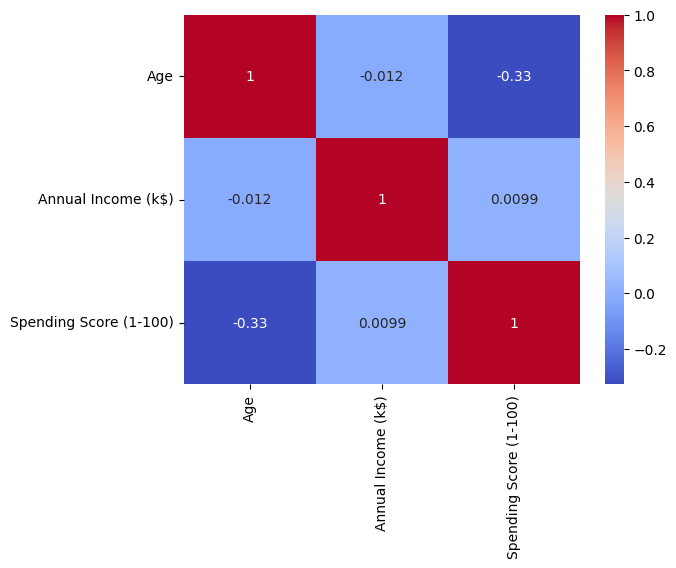

In [93]:
corr_matrix=df_numeric.corr()
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm')

# Handling Categorical features

Gender column is categorical, so we need to transform it to numeric, we can use dummy variables

In [94]:
dummies=pd.get_dummies(df.Gender,dtype=int)
df2=pd.concat([df,dummies],axis='columns')
df2.drop(['Gender','Female'],axis='columns',inplace=True)
df2.head()

,Age,Annual Income (k$),Spending Score (1-100),Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


# Visualizations

([<matplotlib.axis.XTick at 0x7c129b74fbc0>,
 [Text(0, 0, 'Female'), Text(1, 0, 'Male')])

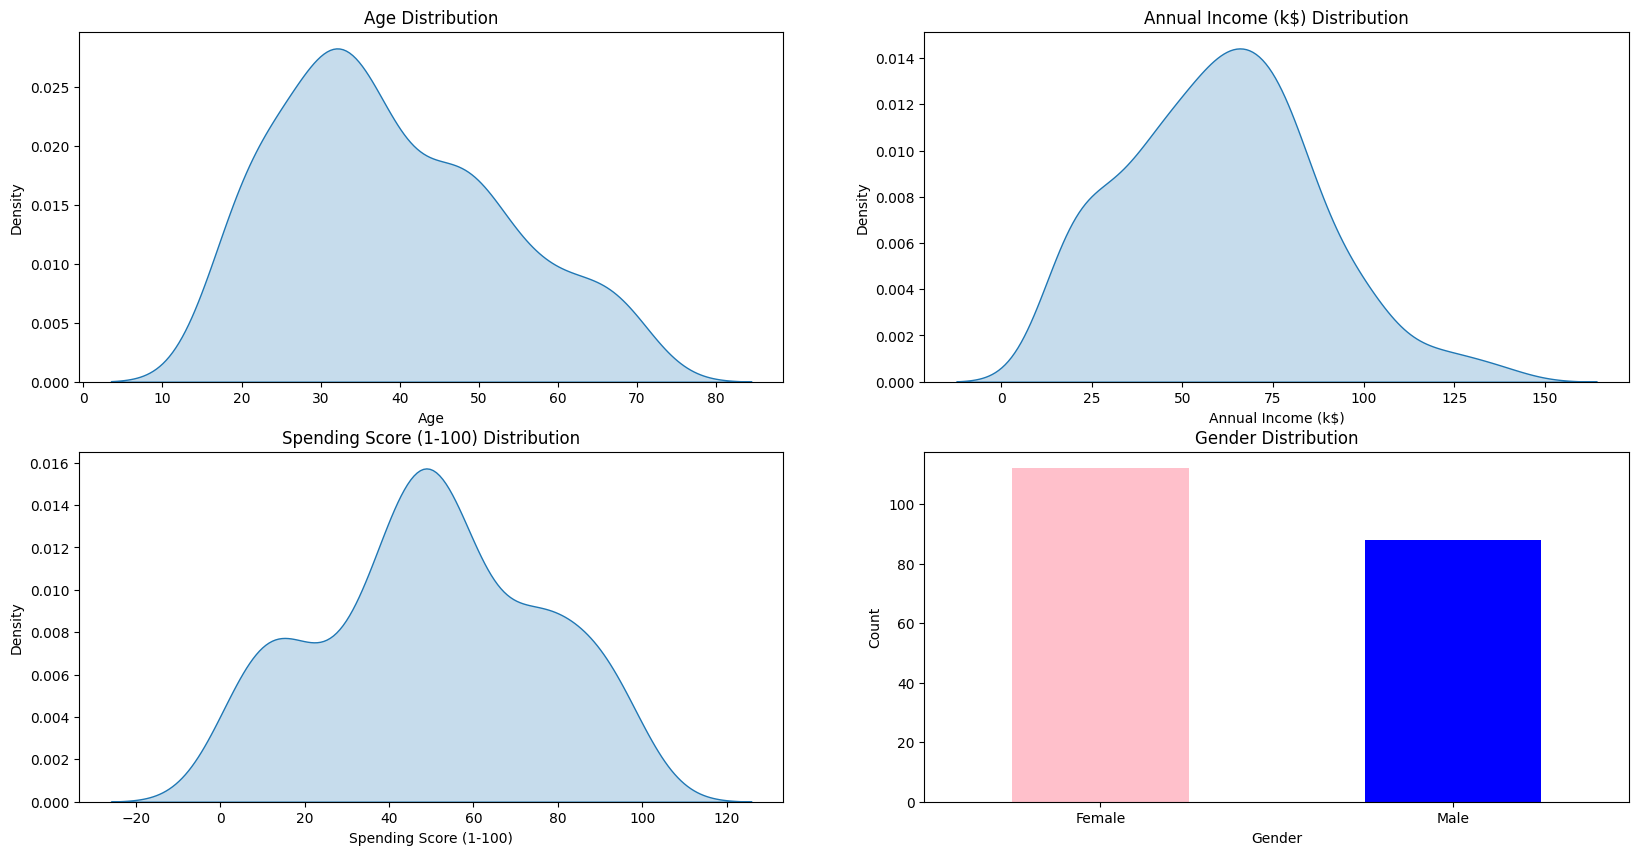

In [95]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sns.kdeplot(data=df2,x='Age',fill=True)
plt.xlabel("Age")
plt.ylabel("Density")
plt.title("Age Distribution")
plt.subplot(2,2,2)
sns.kdeplot(data=df2,x='Annual Income (k$)',fill=True)
plt.xlabel("Annual Income (k$)")
plt.ylabel("Density")
plt.title("Annual Income (k$) Distribution")
plt.subplot(2,2,3)
sns.kdeplot(data=df2,x='Spending Score (1-100)',fill=True)
plt.xlabel("Spending Score (1-100)")
plt.ylabel("Density")
plt.title("Spending Score (1-100) Distribution")
plt.subplot(2,2,4)
df2['Male'].value_counts().plot(kind='bar',color=['pink','blue'])
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Gender Distribution")
plt.xticks(ticks=[0,1],labels=['Female','Male'],rotation=0)

# Checking for outliers

Text(0.5, 1.0, 'Spending Score (1-100) Distribution')

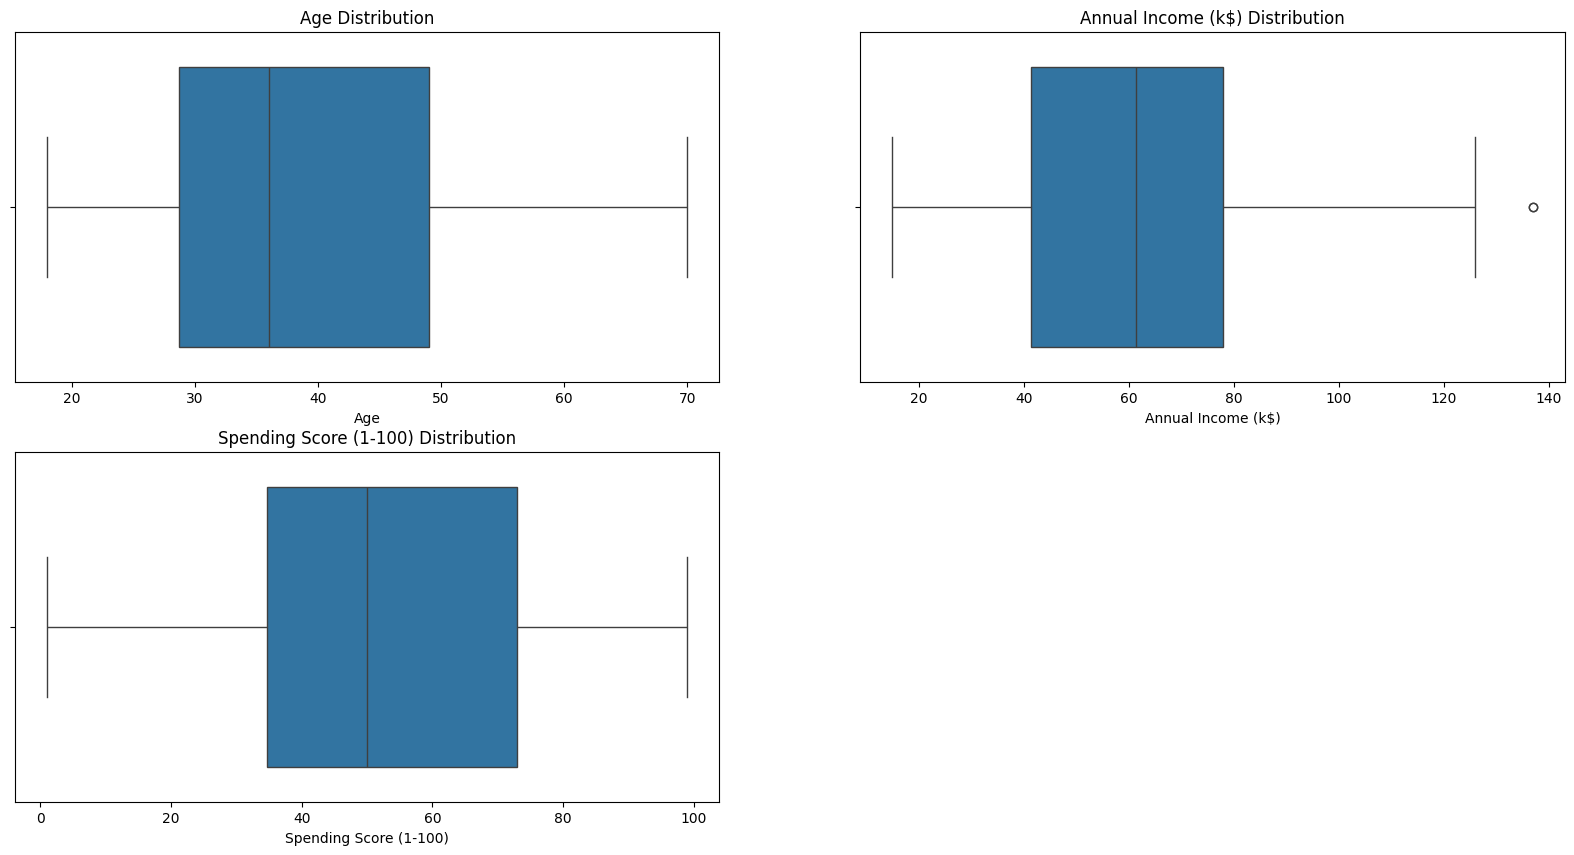

In [96]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sns.boxplot(data=df2,x='Age')
plt.title("Age Distribution")
plt.subplot(2,2,2)
sns.boxplot(data=df2,x='Annual Income (k$)')
plt.title("Annual Income (k$) Distribution")
plt.subplot(2,2,3)
sns.boxplot(data=df2,x='Spending Score (1-100)')
plt.title("Spending Score (1-100) Distribution")


Annual Income has an outlier

# Feature scaling

In [97]:
from sklearn.preprocessing import MinMaxScaler
for col in df2.columns:
    mms=MinMaxScaler()
    df2[col]=mms.fit_transform(df2[[col]])
df2.head()

,Age,Annual Income (k$),Spending Score (1-100),Male
0,0.019231,0.000000,0.387755,1.0
1,0.057692,0.000000,0.816327,1.0
2,0.038462,0.008197,0.051020,0.0
3,0.096154,0.008197,0.775510,0.0
4,0.250000,0.016393,0.397959,0.0


# Models

since it is classification so we can use KMeans clustering algorithm

# KMeans Clustering

Text(0.5, 1.0, 'K vs SSE')

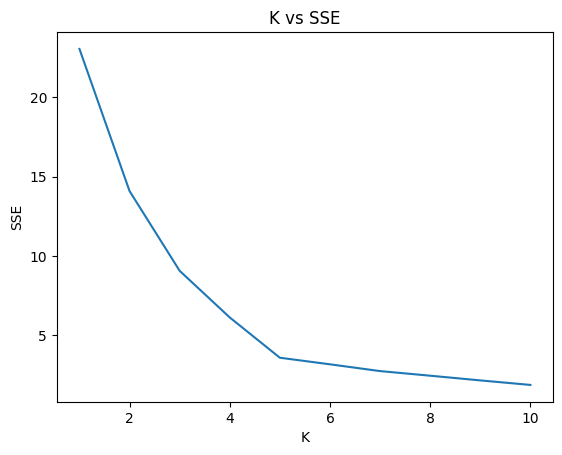

In [98]:
k_rng=range(1,11)
sse=[]
for k in k_rng:
  km=KMeans(n_clusters=k)
  km.fit(df2[['Annual Income (k$)','Spending Score (1-100)']])
  sse.append(km.inertia_)
plt.plot(k_rng,sse)
plt.xlabel("K")
plt.ylabel("SSE")
plt.title("K vs SSE")


In [99]:
from kneed import KneeLocator
kl = KneeLocator(k_rng, sse, curve="convex", direction="decreasing")
print("Elbow at k =", kl.elbow)

Elbow at k = 5


In [100]:
kl.elbow

np.int64(5)

In [101]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=kl.elbow)
y_predicted=km.fit_predict(df2[['Annual Income (k$)','Spending Score (1-100)']])
df2['cluster']=y_predicted
df2.head()

,Age,Annual Income (k$),Spending Score (1-100),Male,cluster
0,0.019231,0.000000,0.387755,1.0,1
1,0.057692,0.000000,0.816327,1.0,4
2,0.038462,0.008197,0.051020,0.0,1
3,0.096154,0.008197,0.775510,0.0,4
4,0.250000,0.016393,0.397959,0.0,1


In [102]:
km.cluster_centers_

array([[0.32866853, 0.49340468],
       [0.08792846, 0.19619666],
       [0.6       , 0.16443149],
       [0.58638083, 0.82783883],
       [0.08792846, 0.79962894]])

# Visualizing the clusters

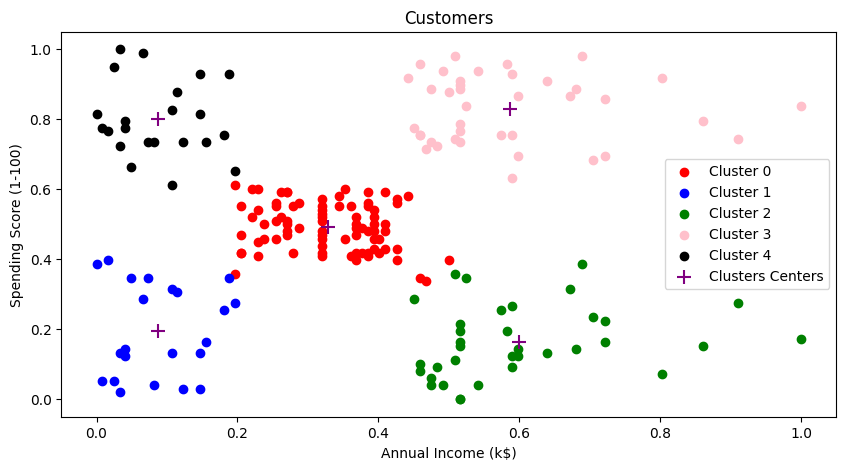

In [103]:
plt.figure(figsize=(10,5))
df_cluster0=df2[df2['cluster']==0]
df_cluster1=df2[df2['cluster']==1]
df_cluster2=df2[df2['cluster']==2]
df_cluster3=df2[df2['cluster']==3]
df_cluster4=df2[df2['cluster']==4]
plt.scatter(df_cluster0['Annual Income (k$)'],df_cluster0['Spending Score (1-100)'],color='red', label='Cluster 0')
plt.scatter(df_cluster1['Annual Income (k$)'],df_cluster1['Spending Score (1-100)'],color='blue', label='Cluster 1')
plt.scatter(df_cluster2['Annual Income (k$)'],df_cluster2['Spending Score (1-100)'],color='green', label='Cluster 2')
plt.scatter(df_cluster3['Annual Income (k$)'],df_cluster3['Spending Score (1-100)'],color='pink', label='Cluster 3')
plt.scatter(df_cluster4['Annual Income (k$)'],df_cluster4['Spending Score (1-100)'],color='black', label='Cluster 4')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='+',label='Clusters Centers',s=100)
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Customers")
plt.legend()